In [98]:
from PIL import Image
import os

def extract_frames(gif_path, output_folder):
    # Abrir el archivo GIF
    with Image.open(gif_path) as img:
        # Asegurarse de que el directorio de salida existe
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Iterar sobre cada frame
        for frame_number in range(img.n_frames):
            # Establecer el frame actual
            img.seek(frame_number)
            # Crear la ruta para guardar el frame
            frame_path = os.path.join(output_folder, f"frame_{frame_number}.png")
            # Guardar el frame como PNG para mantener la calidad
            img.save(frame_path, format="PNG")
            print(f"Frame {frame_number} guardado en {frame_path}")

# Uso de la función
gif_path = "Jamanxim.gif"
output_folder = "imagenes"
extract_frames(gif_path, output_folder)

FileNotFoundError: [Errno 2] No such file or directory: 'Jamanxim.gif'

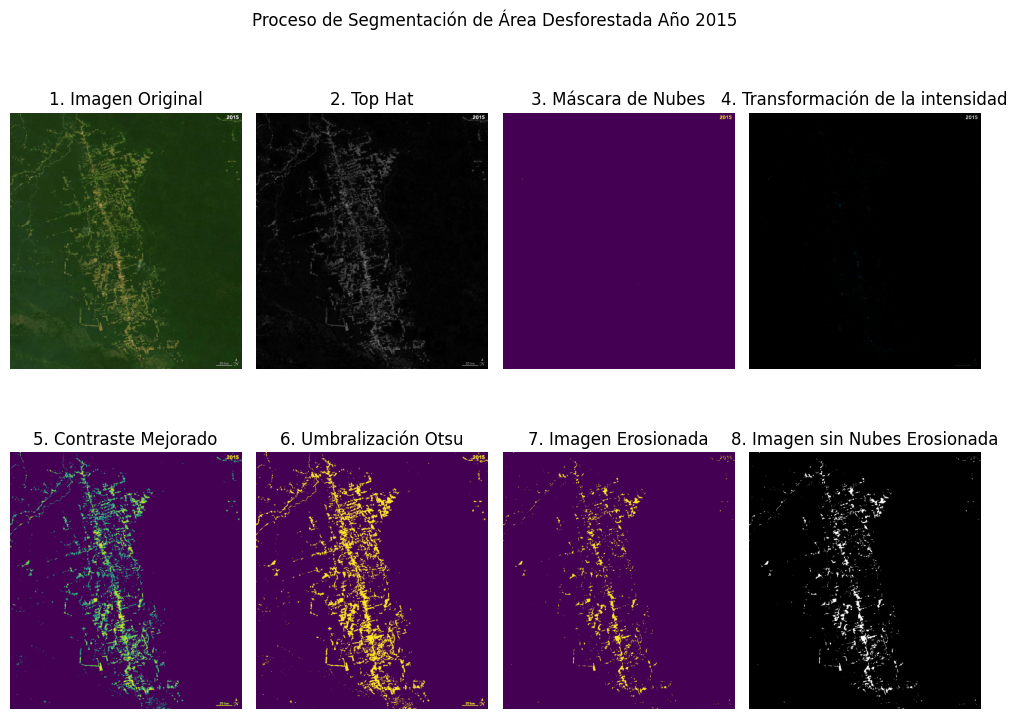

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def segmentar_area_deforestada(image_path, year):
    # Leer la imagen
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Crear una figura para mostrar las imágenes
    plt.figure(figsize=(10, 8))
    plt.suptitle(f'Proceso de Segmentación de Área Desforestada Año {year}', fontsize=12)

    # Mostrar la imagen original
    plt.subplot(2, 4, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('1. Imagen Original')
    plt.axis('off')

    # Aplicar la operación Top Hat para resaltar elementos brillantes como nubes
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    tophat = cv2.morphologyEx(img_gray, cv2.MORPH_TOPHAT, kernel)

    # Mostrar imagen después de Top Hat
    plt.subplot(2, 4, 2)
    plt.imshow(tophat, cmap='gray')
    plt.title('2. Top Hat')
    plt.axis('off')

    # Umbralizar la imagen Top Hat para crear una máscara de nubes
    _, cloud_mask = cv2.threshold(tophat, 150, 255, cv2.THRESH_BINARY)

    # Mostrar la máscara de nubes
    plt.subplot(2, 4, 3)
    plt.imshow(cloud_mask)
    plt.title('3. Máscara de Nubes')
    plt.axis('off')

    # Invertir la máscara de nubes para usarla más adelante
    cloud_mask_inv = cv2.bitwise_not(cloud_mask)

    # Aplicar la transformación de potencia (corrección gamma) para mejorar el contraste
    gamma = 5  # Ajusta este valor según sea necesario
    img_gamma = np.array(255 * (img / 255) ** gamma, dtype='uint8')

    plt.subplot(2, 4, 4)
    plt.imshow(img_gamma)
    plt.title('4. Transformación de la intensidad')
    plt.axis('off')

    # Convertir a escala de grises y mejorar el contraste con ecualización de histograma
    img_gamma_gray = cv2.cvtColor(img_gamma, cv2.COLOR_BGR2GRAY)
    img_eq = cv2.equalizeHist(img_gamma_gray)

    plt.subplot(2, 4, 5)
    plt.imshow(img_eq)
    plt.title('5. Contraste Mejorado')
    plt.axis('off')

    # Umbralización usando el método de Otsu para segmentar las áreas destacadas
    _, otsu_thresh = cv2.threshold(img_eq, 0, 255, cv2.THRESH_OTSU)

    plt.subplot(2, 4, 6)
    plt.imshow(otsu_thresh)
    plt.title('6. Umbralización Otsu')
    plt.axis('off')

    # Aplicar erosión para eliminar áreas pequeñas (como ríos) en la imagen binaria
    kernel_erosion = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    eroded_image = cv2.erode(otsu_thresh, kernel_erosion, iterations=2)

    # Mostrar la imagen erosionada
    plt.subplot(2, 4, 7)
    plt.imshow(eroded_image)
    plt.title('7. Imagen Erosionada')
    plt.axis('off')

    # Aplicar la máscara inversa para eliminar nubes de la imagen erosionada
    img_without_clouds = cv2.bitwise_and(eroded_image, eroded_image, mask=cloud_mask_inv)

    # Mostrar la imagen final sin nubes y erosionada
    plt.subplot(2, 4, 8)
    plt.imshow(img_without_clouds, cmap='gray')
    plt.title('8. Imagen sin Nubes Erosionada')
    plt.axis('off')

    # Guardar la imagen final
    image_filename = 'binary_' + image_path
    output_path = os.path.join('imagenes_binarias', image_filename)
    cv2.imwrite(output_path, img_without_clouds)

    # Ajustar el diseño de todas las imágenes y mostrar
    plt.tight_layout(rect=[0, 0, 1, 1])  # Ajusta el valor de 0.93 para reducir el espacio

    plt.show()

# Llamar a la función con la ruta de la imagen
segmentar_area_deforestada('frame_15.png',2015)

In [57]:
for i in range(20):
    print(f'_______________________Segmentando Frame {i}_______________________________')

    image_path= f'frame_{i}.png'
    segmentar_area_deforestada(image_path)

Output hidden; open in https://colab.research.google.com to view.

In [99]:
import cv2

def calcular_area_blanca(image_path):
    # Leer la imagen binarizada
    binary_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Contar el número de píxeles blancos
    num_white_pixels = cv2.countNonZero(binary_image)

    # Calcular el área en píxeles de un km²
    # Si 51 píxeles equivalen a 20 km, entonces
    # 1 km equivale a (51 / 20) píxeles
    pixels_per_km = 51 / 20
    km2_per_pixel = (1 / pixels_per_km) ** 2

    # Calcular el área blanca en km²
    area_km2 = num_white_pixels * km2_per_pixel

    return area_km2

for i in range(20):
    print(f'_______________________Frame {i}_______________________________')
    binary_image_path = f'imagenes_binarias/binary_frame_{i}.png'
    area = calcular_area_blanca(binary_image_path)
    print(f'Área deforestada en km²: {area:.2f}')

_______________________Frame 0_______________________________
Área deforestada en km²: 651.44
_______________________Frame 1_______________________________
Área deforestada en km²: 533.33
_______________________Frame 2_______________________________
Área deforestada en km²: 731.87
_______________________Frame 3_______________________________
Área deforestada en km²: 1231.06
_______________________Frame 4_______________________________
Área deforestada en km²: 1122.03
_______________________Frame 5_______________________________
Área deforestada en km²: 1109.57
_______________________Frame 6_______________________________
Área deforestada en km²: 1509.42
_______________________Frame 7_______________________________
Área deforestada en km²: 1929.72
_______________________Frame 8_______________________________
Área deforestada en km²: 2535.18
_______________________Frame 9_______________________________
Área deforestada en km²: 2860.75
_______________________Frame 10______________________

In [108]:
import cv2
import matplotlib.pyplot as plt
import os

def dibujar_contornos_en_imagen(original_image_path, binary_image_path, i):

    if i < 10:
      i = '0' + str(i)
    else:
      i = str(i)
    # Leer la imagen original
    img_original = cv2.imread(original_image_path)
    # Leer la imagen binaria
    img_binary = cv2.imread(binary_image_path, cv2.IMREAD_GRAYSCALE)

    # Encontrar los contornos en la imagen binaria
    contours, _ = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar los contornos sobre la imagen original
    img_contoured = img_original.copy()
    cv2.drawContours(img_contoured, contours, -1, (0, 0, 255), 2)  # Dibuja en rojo con grosor 2

    # Guardar la imagen con los contornos dibujados
    image_filename = 'contorno_' + image_path

    output_path = os.path.join('imagenes_contorneadas', image_filename)
    cv2.imwrite(output_path, img_contoured)

    # Crear una figura para mostrar las imágenes
    plt.figure(figsize=(12, 6))

    # Mostrar la imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
    plt.title(f'Imagen Original Año 20{i}')
    plt.axis('off')

    # Mostrar la imagen con contornos
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_contoured, cv2.COLOR_BGR2RGB))
    plt.title(f'Área Deforestada Año 20{i}')
    plt.axis('off')

    # Ajustar el diseño y mostrar
    plt.tight_layout()
    plt.show()




# Llamar a la función para cada par de imágenes
for i in range(20):
    original_path = f'frame_{i}.png'
    binary_path = f'imagenes_binarias/binary_frame_{i}.png'
    output_path = f'contoured_frame_{i}.png'
    dibujar_contornos_en_imagen(original_path, binary_path, i)

Output hidden; open in https://colab.research.google.com to view.

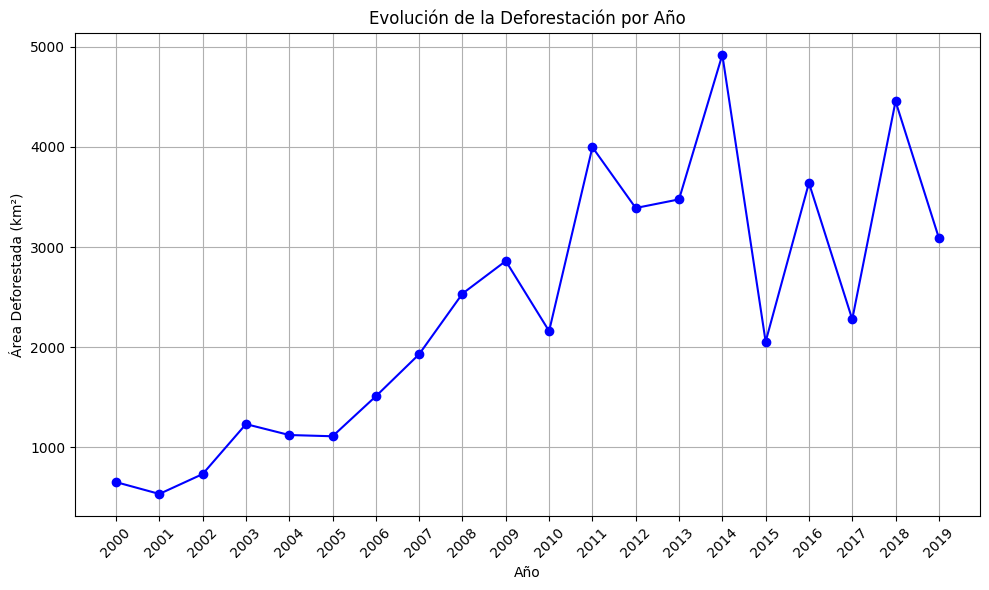

In [66]:
import matplotlib.pyplot as plt

# Datos de deforestación por año
años = list(range(2000, 2020))
areas_deforestadas = [
    651.44, 533.33, 731.87, 1231.06, 1122.03,
    1109.57, 1509.42, 1929.72, 2535.18, 2860.75,
    2160.25, 3997.85, 3390.23, 3476.36, 4921.03,
    2054.44, 3641.06, 2277.89, 4456.29, 3091.27
]

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(años, areas_deforestadas, marker='o', linestyle='-', color='b')

# Títulos y etiquetas
plt.title('Evolución de la Deforestación por Año')
plt.xlabel('Año')
plt.ylabel('Área Deforestada (km²)')
plt.xticks(años, rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para evitar solapamiento
plt.show()

In [115]:
import imageio
import os
import re


def crear_gif_desde_carpeta(carpeta_imagenes, nombre_gif, duracion=20):
    # Obtener una lista de archivos de imagen en la carpeta
    archivos_imagenes = [f for f in os.listdir(carpeta_imagenes) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    def extraer_numero(nombre_archivo):
      numeros = re.findall(r'\d+', nombre_archivo)
      return int(numeros[0]) if numeros else 0

    # Ordenar los archivos usando los números en sus nombres
    archivos_imagenes.sort(key=extraer_numero)


    # Crear una lista para almacenar las imágenes
    frames = []

    # Leer y añadir cada imagen a la lista de frames
    for archivo in archivos_imagenes:
        print(f"Procesando imagen: {archivo}")
        ruta_imagen = os.path.join(carpeta_imagenes, archivo)
        imagen = imageio.imread(ruta_imagen)
        frames.append(imagen)

    # Guardar las imágenes como un GIF
    imageio.mimsave(nombre_gif, frames, duration=duracion)

    print(f"GIF guardado como {nombre_gif}")

# Ejemplo de uso
crear_gif_desde_carpeta('imagenes_contorneadas', 'area_deforestada.gif', duracion=0.5)

Procesando imagen: 1.png
Procesando imagen: 2.png
Procesando imagen: 3.png
Procesando imagen: 4.png
Procesando imagen: 5.png
Procesando imagen: 6.png
Procesando imagen: 7.png


<ipython-input-115-63b6c9e74d1f>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen = imageio.imread(ruta_imagen)


Procesando imagen: 8.png
Procesando imagen: 9.png
Procesando imagen: 10.png
Procesando imagen: 11.png
Procesando imagen: 12.png
Procesando imagen: 13.png
Procesando imagen: 14.png
Procesando imagen: 15.png
Procesando imagen: 16.png
Procesando imagen: 17.png
Procesando imagen: 18.png
Procesando imagen: 19.png
Procesando imagen: 20.png
GIF guardado como area_deforestada.gif
